## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Converting dataset to a dataframe

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


We observe only 2 variables, so we follow Simple Linear Regression

## Modeling of the Data

### A. sklearn.linear_model.LinearRegression

This model uses ordinary least squares method for Linear Regression <br />
Here we indirectly feed the entire dataset as the training set and leave the rest to the algoritm.

In [4]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(df[['Hours']])
y = np.asanyarray(df[['Scores']])
regr.fit (x, y) 
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.77580339]]
Intercept:  [2.48367341]


### Creating a plot

Text(0, 0.5, 'Marks scored')

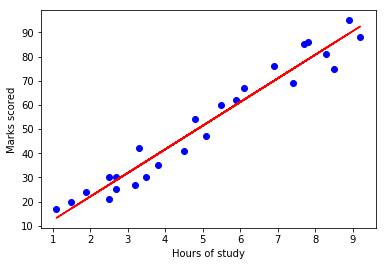

In [7]:
plt.scatter(df.Hours, df.Scores,  color='blue')
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.xlabel("Hours of study")
plt.ylabel("Marks scored")

### Problem Statement:

Q. What is the predicted score if the student studies for 9.25 hrs?

In [8]:
z = regr.intercept_[0] + 9.25*regr.coef_[0][0]
print('Expected score: {score}'.format(score = z))
print('Approx score: {score}'.format(score = int(round(z))))

Expected score: 92.90985477015731
Approx score: 93


### B. Using Classic ML approach to train and test models

In this approach we split our dataset into train and test sets. 
Separating the data enables shall enable us to evaluate our model generalization capabilities.<br/>
We shall see how this is implemented.

In [9]:
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [10]:
# We train our Algoritm on the generated training set
Reg = linear_model.LinearRegression()
Reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Making Predictions

In [11]:
print(X_test) # Testing data - In Hours
yhat = Reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
Yhat = np.ndarray.tolist(yhat) # convert numpy array to a list
Yhat

[[16.884144762398037],
 [33.73226077948984],
 [75.35701799818723],
 [26.794801243040276],
 [60.491033277223885]]

In [13]:
Y_test = np.ndarray.tolist(y_test)
lst = []
for ele in Y_test:
    lst.append(ele[0])
Y_test = lst
Y_test

[20, 27, 69, 30, 62]

In [16]:
# Comparing Actual vs Predicted
df_new = pd.DataFrame({'Actual': Y_test, 'Predicted': Yhat})  
df_new

,Actual,Predicted
0,20,[16.884144762398037]
1,27,[33.73226077948984]
2,69,[75.35701799818723]
3,30,[26.794801243040276]
4,62,[60.491033277223885]


### Making Predictions

In [17]:
w = Reg.intercept_[0] + 9.25*Reg.coef_[0][0]
print('Expected score: {score}'.format(score = w))
print('Approx score: {score}'.format(score = int(round(w))))

Expected score: 93.69173248737538
Approx score: 94


### Evaluating of the Model

The final step is to evaluate the performance of algorithm. 
This step is particularly important to compare how well different algorithms perform on a particular dataset.
For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Yhat)) 

Mean Absolute Error: 4.183859899002975


## Conclusion

The evaluation of a model skill totally on the training dataset would result in a biased score.
Therefore the model is evaluated on the held-out sample to give an unbiased estimate of model skill. 
This is typically called a train-test split approach to algorithm evaluation.